##Load the data

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import pandas as pd #data manipulation library
import numpy as np #numerical operations library
import matplotlib.pyplot as plt #library for creating visualizations
import seaborn as sns #library for making statistical visuals more attractive
from sklearn.feature_selection import mutual_info_classif, SelectKBest, RFE, chi2 , SelectFromModel, f_classif
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split #library for splitting train and test sets
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,StandardScaler #OrdinalEncoder for ordinal categories, OneHotEncoder for nominal categories, and StandardScaler to normalize numerical data
from sklearn.compose import ColumnTransformer #applies different preprocessing to specified columns, handling mixed data types efficiently
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
#load the data
pd.set_option('display.max_columns',100)
fpath = '/content/drive/MyDrive/Group 2/travel_insurance_dataset.csv'
df = pd.read_csv(fpath)
df.head(10)

,Customer_ID,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1042106507,31,Government Sector,Yes,4 800 000,6,1,No,No,0
1,1045040226,31,Private Sector/Self Employed,Yes,15 000 000,7,0,No,No,0
2,1048224863,34,Private Sector/Self Employed,Yes,6 000 000,4,1,No,No,1
3,1046343806,28,Private Sector/Self Employed,Yes,8 400 000,3,1,No,No,0
4,1046837252,28,Private Sector/Self Employed,Yes,8 400 000,8,1,Yes,No,0
5,1045443965,25,Private Sector/Self Employed,No,13 800 000,4,0,No,No,0
6,1044147304,31,Government Sector,Yes,15 600 000,4,0,No,No,0
7,1041495394,31,Private Sector/Self Employed,Yes,16 200 000,3,0,Yes,Yes,1
8,1046230749,28,Private Sector/Self Employed,Yes,17 400 000,6,1,Yes,Yes,1
9,1048311359,33,Government Sector,Yes,9 600 000,3,0,Yes,No,0


## Data Cleaning & Analysis

In [ ]:
#check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4    AnnualIncome        1987 non-null   object
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 155.4+ KB


In [ ]:
df.columns

Index(['Customer_ID', 'Age', 'Employment Type', 'GraduateOrNot',
       ' AnnualIncome ', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [ ]:
# Replace spaces in the ' AnnualIncome' column name
df.rename(columns={' AnnualIncome ': 'AnnualIncome'}, inplace=True)

In [ ]:
#change annualincome datatype from object to int
df['AnnualIncome'] = df['AnnualIncome'].astype(str).str.replace(' ', '').astype(int)
df['AnnualIncome'].dtype

dtype('int64')

In [ ]:
#check each string column's value counts for inconsistent values.
df.nunique()

,0
Customer_ID,1987
Age,11
Employment Type,2
GraduateOrNot,2
AnnualIncome,30
FamilyMembers,8
ChronicDiseases,2
FrequentFlyer,2
EverTravelledAbroad,2
TravelInsurance,2


In [ ]:
#loop through the list of string columns

for col in df.select_dtypes(include='object').columns:
    #print the value counts for each column
    print(f"Value counts for {col}:\n")
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Value counts for Employment Type:

Employment Type
Private Sector/Self Employed    1417
Government Sector                570
Name: count, dtype: int64

--------------------------------------------------

Value counts for GraduateOrNot:

GraduateOrNot
Yes    1692
No      295
Name: count, dtype: int64

--------------------------------------------------

Value counts for FrequentFlyer:

FrequentFlyer
No     1570
Yes     417
Name: count, dtype: int64

--------------------------------------------------

Value counts for EverTravelledAbroad:

EverTravelledAbroad
No     1607
Yes     380
Name: count, dtype: int64

--------------------------------------------------



In [ ]:
#check for duplicated rows
df.duplicated().sum()

0

In [ ]:
#check for missing values
df.isnull().sum()

,0
Customer_ID,0
Age,0
Employment Type,0
GraduateOrNot,0
AnnualIncome,0
FamilyMembers,0
ChronicDiseases,0
FrequentFlyer,0
EverTravelledAbroad,0
TravelInsurance,0


In [ ]:
#check unique values in age
df['Age'].unique()

array([31, 34, 28, 25, 33, 26, 32, 29, 35, 30, 27])

In [ ]:
#count how many values were in each
df['Age'].value_counts()

,count
Age,
28,506
34,266
31,234
29,192
33,148
26,148
25,146
27,131
32,91


In [ ]:
#bin age data to make visual representations clearer and more insightful
bins = [0, 30, 35, float('inf')]   # inf is for age greater than 35
labels = ['Below 30','30-34', 'Above 34']
# Create Age_group with pd.cut
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
# Convert Age_group column from category to object
df['Age_group'] = df['Age_group'].astype('object')
df['Age_group'].dtype

dtype('O')

In [ ]:
df['Age_group'].value_counts()

,count
Age_group,
Below 30,1123
30-34,804
Above 34,60


In [ ]:
#create income bins and labels
income_bins = [0, 5000000, 10000000, 15000000, 20000000, df['AnnualIncome'].max()]
income_labels = ['0-5M', '5-10M', '10-15M', '15-20M', '20M+']

# Create a new column for income categories
df['IncomeCategory'] = pd.cut(df['AnnualIncome'], bins=income_bins, labels=income_labels)


In [ ]:
df['IncomeCategory'] = df['IncomeCategory'].astype('object')
df['IncomeCategory'].dtype

dtype('O')

# Visualisation

##UNI-VARIATE ANALYSIS

## Target Variable Distribution (Travel Insurance)

Purpose: To see the balance between customers who have travel insurance and those who do not. This will help you identify class imbalance, which might affect model choice and performance.

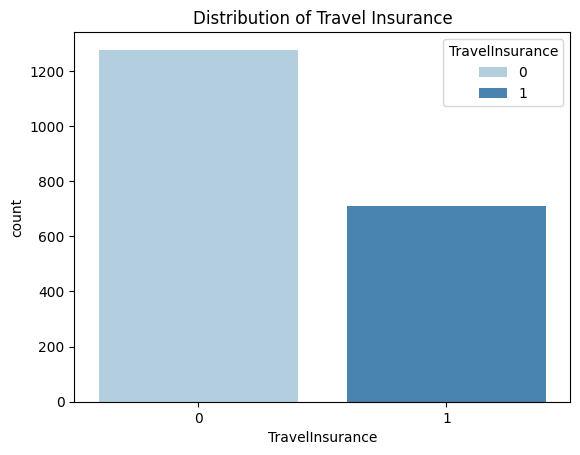

In [ ]:
#map 0 to 'No' and 1 to 'Yes' in the TravelInsurance column
TravelInsurance = df['TravelInsurance'].map({0: 'No', 1: 'Yes'})

#plot the count plot with red color
sns.countplot(x='TravelInsurance', data=df, hue='TravelInsurance', palette='Blues')
plt.title('Distribution of Travel Insurance')
plt.show()


### Interpretation of the Results
The analysis of our travel insurance data shows that most individuals surveyed did not purchase travel insurance, with 1,300 opting out versus 700 who chose to buy it. This suggests that there may be low awareness, interest, or perceived need for travel insurance in this demographic

## Age Distribution

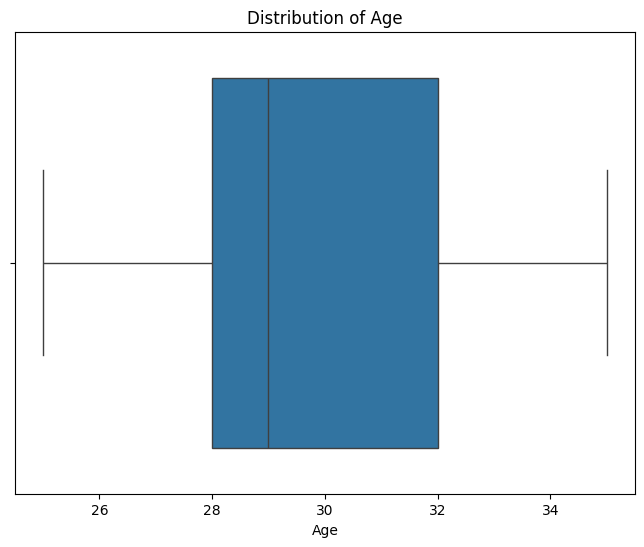

In [ ]:
#box plot for the age column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

## Enployment Type Distribution

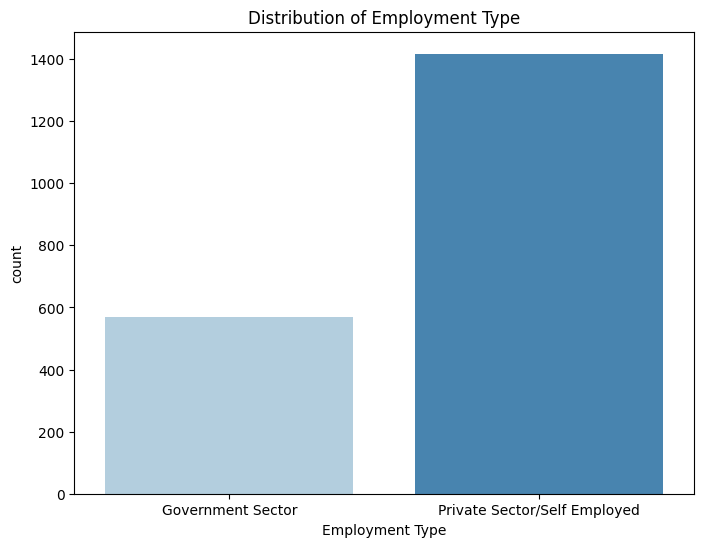

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employment Type', hue='Employment Type', palette='Blues')
plt.title('Distribution of Employment Type')
# plt.xlabel('Employment Type')
# plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Interpretation of the results
The employment distribution analysis shows that a significant majority of individuals are employed in the private sector, with around 1,400 individuals compared to 590 in government roles. This insight highlights the dominance of private sector employment among the surveyed population. Understanding this distribution helps us tailor programs, benefits, or incentives specific to each employment type, as needs and preferences may vary based on sector.

## Distribution of Education Level

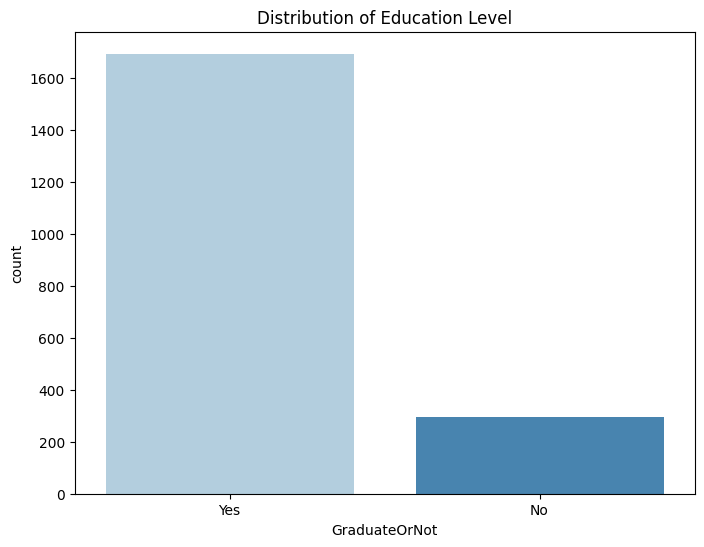

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GraduateOrNot', hue='GraduateOrNot', palette='Blues')
plt.title('Distribution of Education Level')
# plt.xlabel('Employment Type')
# plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Interpretation of the Results
Our analysis of education levels reveals that a significant portion of the population are graduates, with about 1,700 individuals holding a degree compared to only 300 who are non-graduates. This indicates a well-educated demographic, which could influence how we approach communication, service offerings, and targeted initiatives that align with the educational background of this audience.

# Annual Income Distribution

Purpose: To see how the annual income is distributed. This can inform about the income levels of customers and if certain income groups are more likely to buy travel insurance.

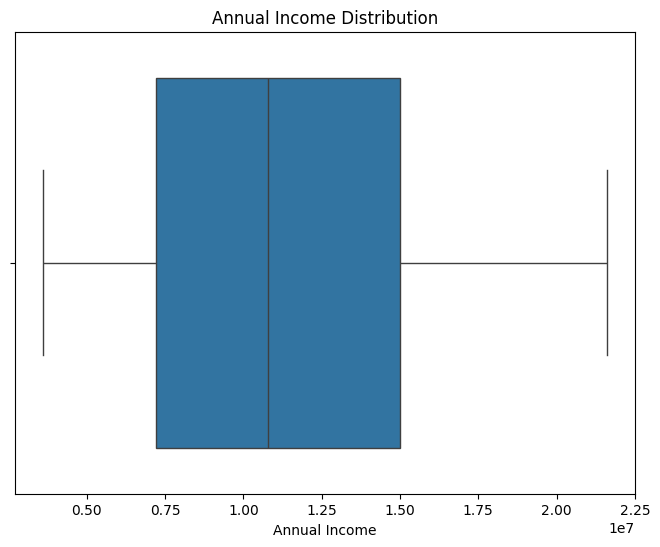

In [ ]:
#box plot for the annual income column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['AnnualIncome'])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.show()

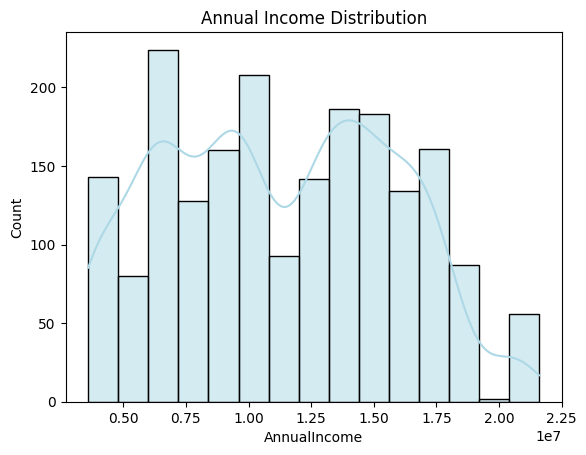

In [ ]:
#histogram for the annual income column
sns.histplot(df['AnnualIncome'], kde=True, color='lightblue')
plt.title('Annual Income Distribution')
plt.show()

### Interpretation of the results
The distribution of annual incomes shows a diverse spread across different income levels, with relatively balanced representation. Most individuals have incomes within the 5 to 15 million range. The peaks and dips across different ranges suggest that there are variations in income distribution, but no extreme concentration in any single range. This pattern provides insight into the diversity of income levels in our population, which could be useful for tailoring products or services to a broad spectrum of income groups.

## Family Members Distribution

---

Purpose: show patterns of interest in travel insurance among individuals with larger or smaller families.

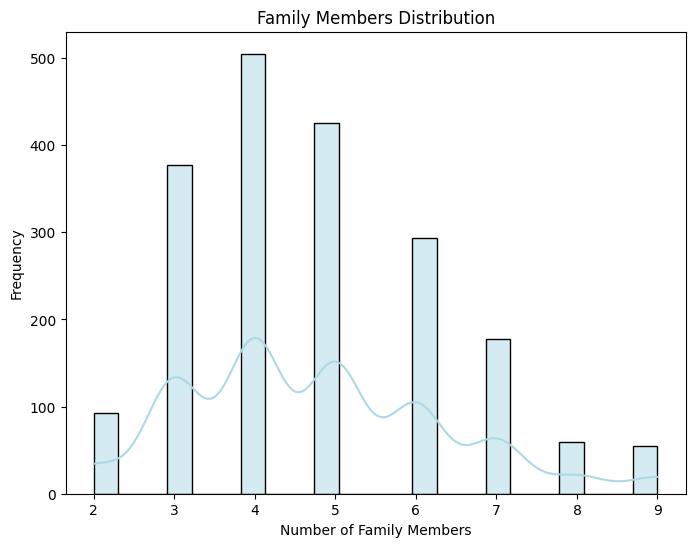

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['FamilyMembers'], kde=True, color='lightblue')
plt.title('Family Members Distribution')
plt.xlabel('Number of Family Members')
plt.ylabel('Frequency')
plt.show()

### Interpretation of the Results
Our analysis of family size shows that households typically consist of 3 to 5 members, with 4-member families being the most common. Larger families (6 or more members) are less frequent in the population. This insight can be valuable for tailoring services or products aimed at typical family units, ensuring that resources align with common household structures.

##Chronic Diseases Distribution

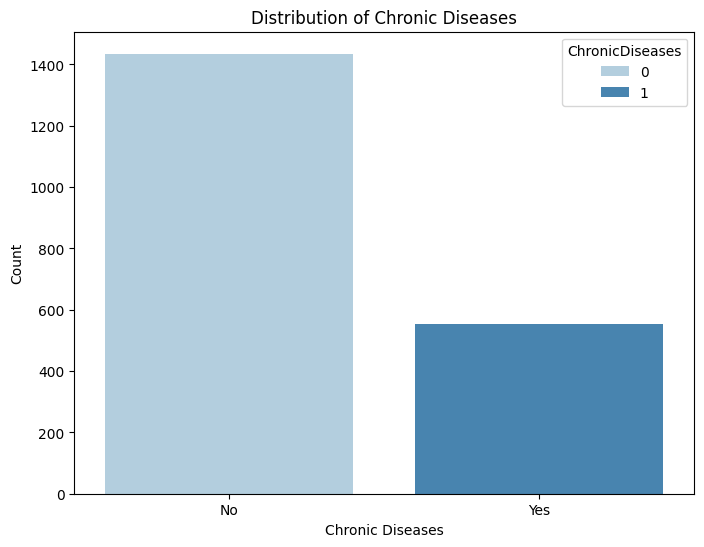

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ChronicDiseases', hue='ChronicDiseases',  palette='Blues')
plt.title('Distribution of Chronic Diseases')
plt.xlabel('Chronic Diseases')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


### Interpretation of the Results
Our analysis of chronic disease distribution among customers reveals that 26% of customers have chronic conditions, while 74% do not.

## Distribution of Frequent Flyer

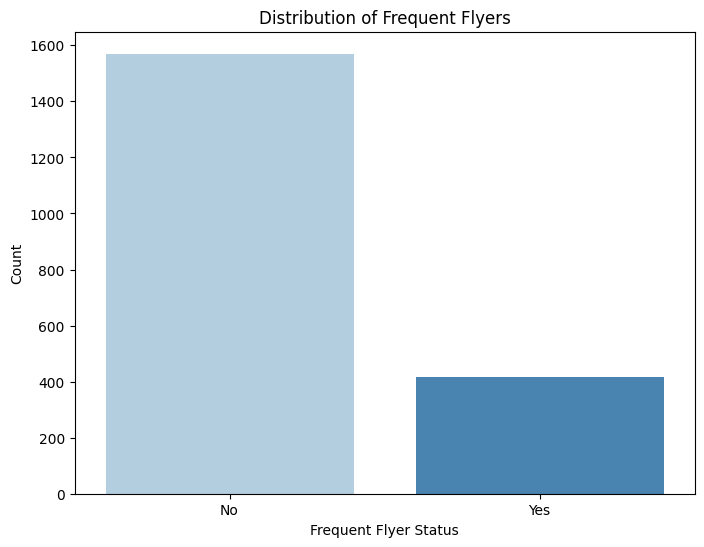

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FrequentFlyer', hue='FrequentFlyer',  palette='Blues')
plt.title('Distribution of Frequent Flyers')
plt.xlabel('Frequent Flyer Status')
plt.ylabel('Count')
plt.show()

### Interpretation

Our analysis shows that only 20% of customers are frequent flyers, while the majority, 80%, do not frequently travel

##Distribution of People Who Haave Travelled Abroad

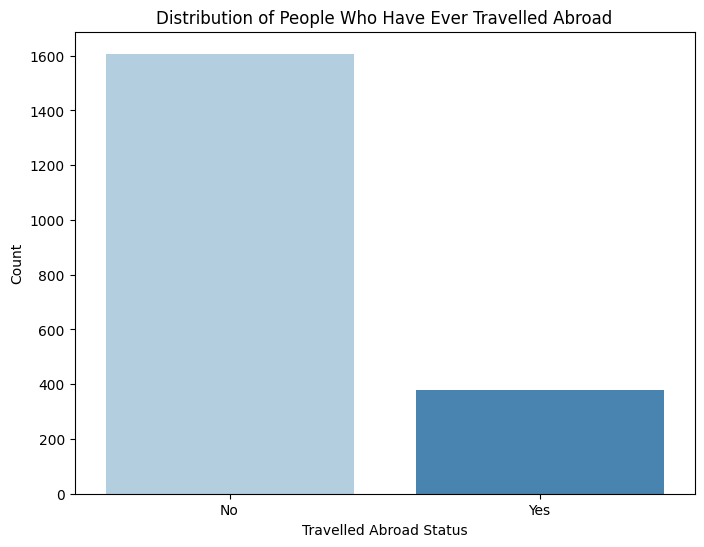

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EverTravelledAbroad', hue='EverTravelledAbroad',  palette='Blues')
plt.title('Distribution of People Who Have Ever Travelled Abroad')
plt.xlabel('Travelled Abroad Status')
plt.ylabel('Count')
plt.show()

##BI-VARIATE ANALYSIS


## Checking Distribution for categorical columns with the Target in dataset

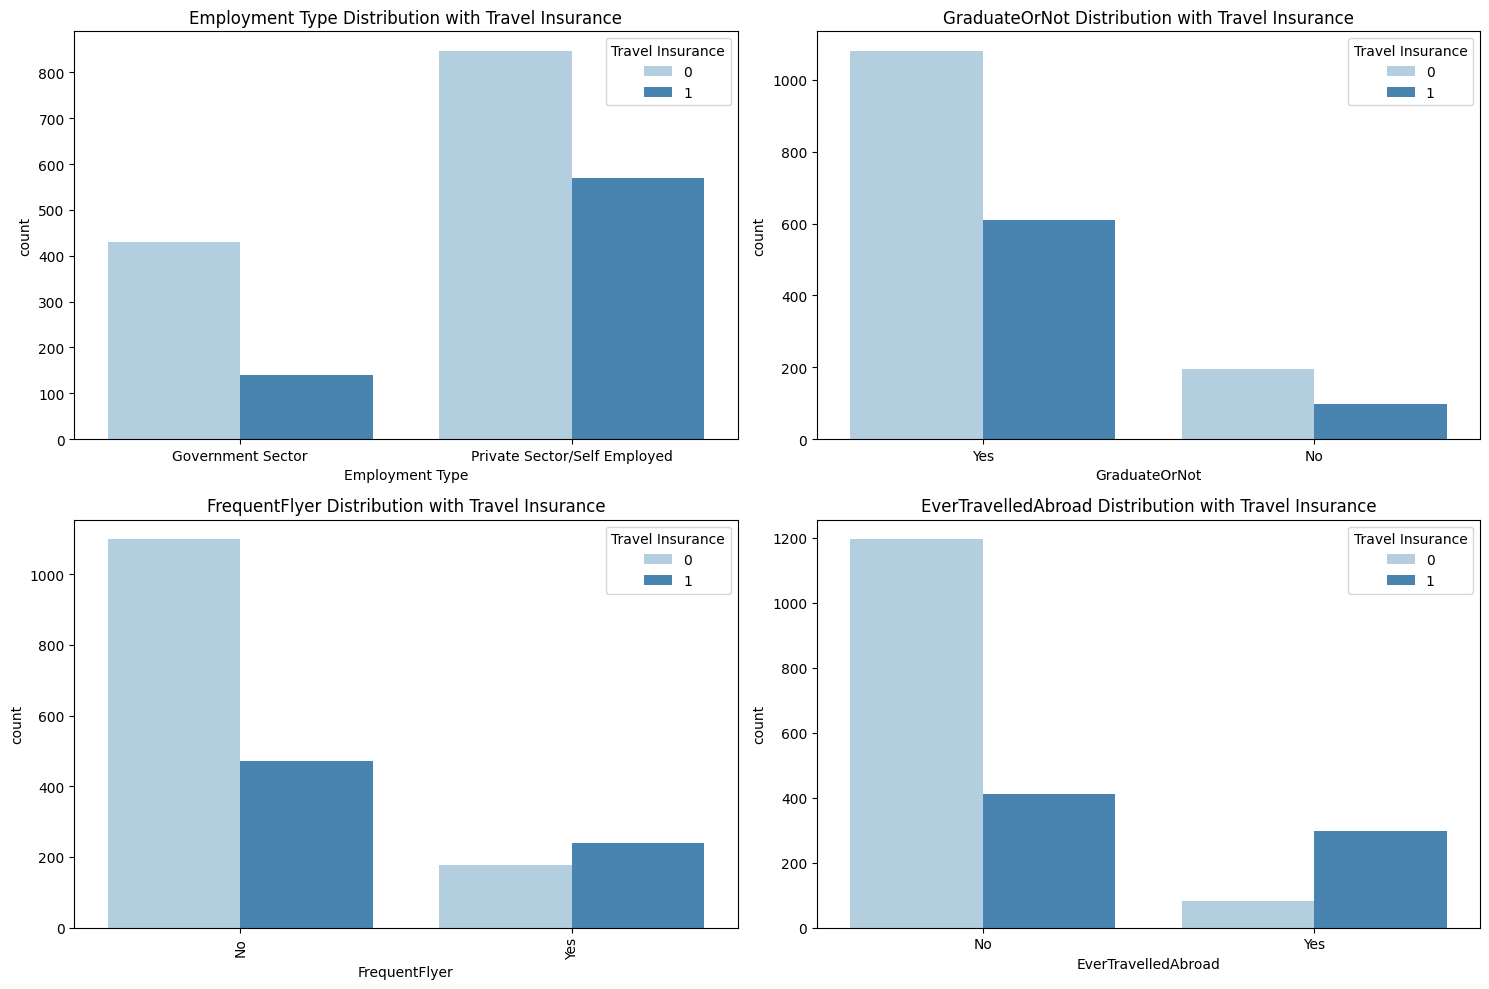

In [ ]:
plt.figure(figsize=(15,10))

# Employment Type Distribution with Travel Insurance hue
plt.subplot(2,2,1)
sns.countplot(data=df, x='Employment Type', hue='TravelInsurance', palette='Blues')
plt.title('Employment Type Distribution with Travel Insurance')
plt.legend(title='Travel Insurance')

# GraduateOrNot Distribution with Travel Insurance hue
plt.subplot(2,2,2)
sns.countplot(data=df, x='GraduateOrNot', hue='TravelInsurance', palette='Blues')
plt.title('GraduateOrNot Distribution with Travel Insurance')
plt.legend(title='Travel Insurance')

# FrequentFlyer Distribution with Travel Insurance hue
plt.subplot(2,2,3)
sns.countplot(data=df, x='FrequentFlyer', hue='TravelInsurance', palette='Blues')
plt.xticks(rotation=90)
plt.title('FrequentFlyer Distribution with Travel Insurance')
plt.legend(title='Travel Insurance')

# EverTravelledAbroad Distribution with Travel Insurance hue
plt.subplot(2,2,4)
sns.countplot(data=df, x='EverTravelledAbroad', hue='TravelInsurance', palette='Blues')
plt.title('EverTravelledAbroad Distribution with Travel Insurance')
plt.legend(title='Travel Insurance')

plt.tight_layout()
plt.show()

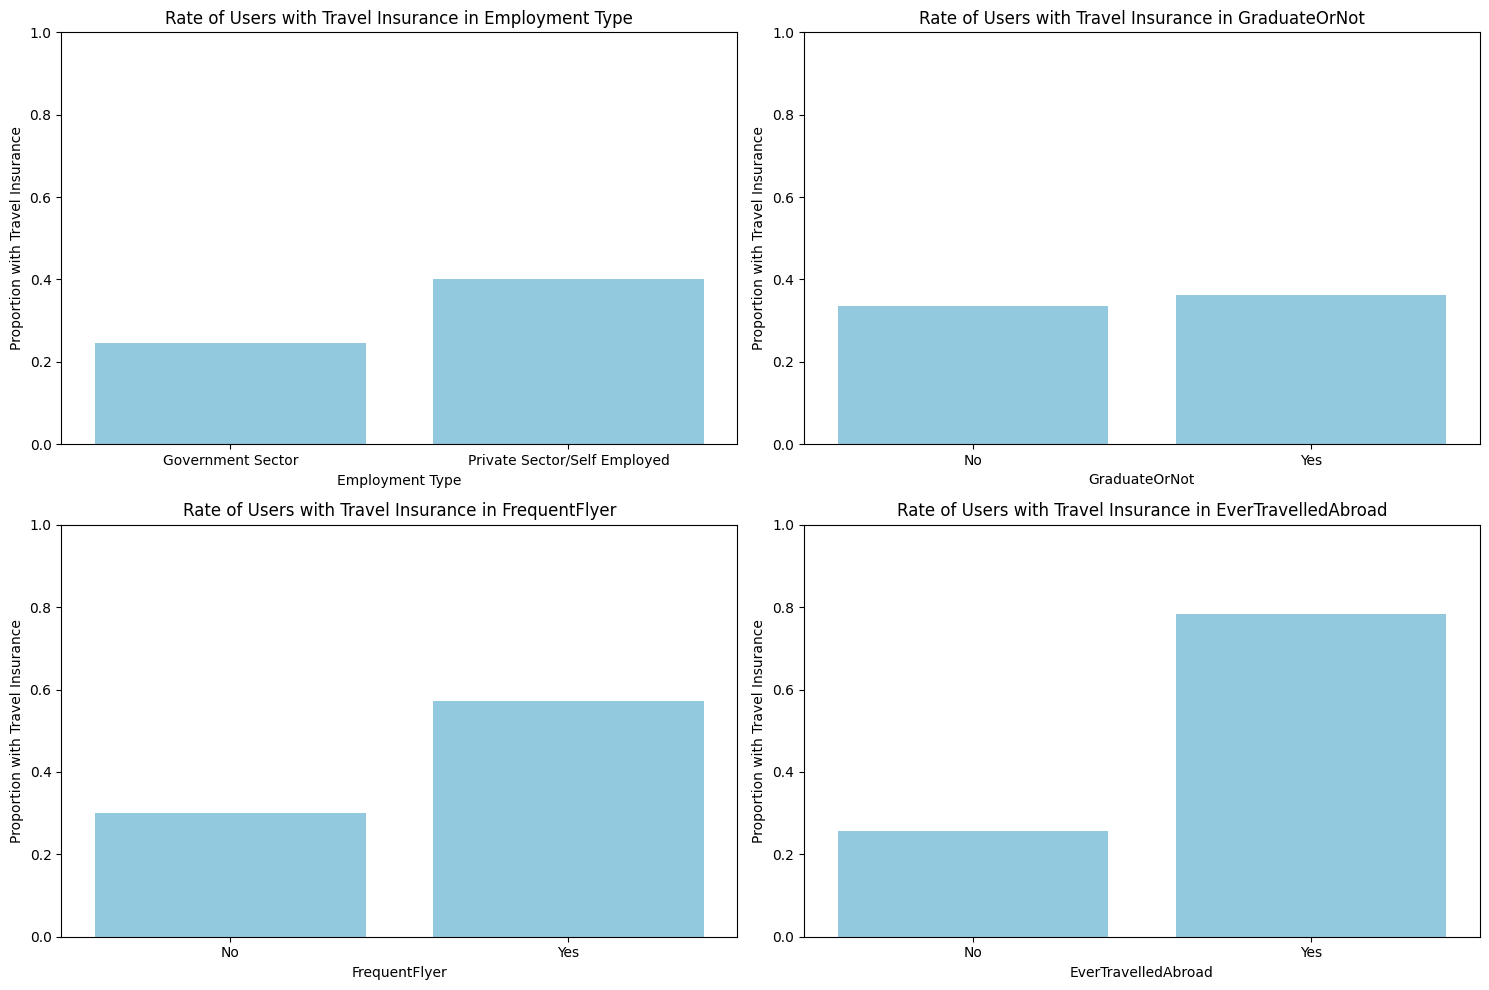

In [ ]:
# Define a function to calculate the rate of people with Travel Insurance and plot it
def plot_insurance_rate(df, x_col, ax):
    # Calculate the percentage of people with Travel Insurance for each category
    prop_df = df.groupby(x_col)['TravelInsurance'].mean().reset_index()

    sns.barplot(data=prop_df, x=x_col, y='TravelInsurance', ax=ax, color='skyblue')
    ax.set_ylim(0, 1)  # Set y-axis limit between 0 and 1 for proportions
    ax.set_title(f'Rate of Users with Travel Insurance in {x_col}')
    ax.set_ylabel('Proportion with Travel Insurance')


# Plotting the rate of travel insurance for each feature
plt.figure(figsize=(15, 10))

# Employment Type Distribution
ax1 = plt.subplot(2, 2, 1)
plot_insurance_rate(df, 'Employment Type', ax1)

# GraduateOrNot Distribution
ax2 = plt.subplot(2, 2, 2)
plot_insurance_rate(df, 'GraduateOrNot', ax2)

# FrequentFlyer Distribution
ax3 = plt.subplot(2, 2, 3)
plot_insurance_rate(df, 'FrequentFlyer', ax3)

# EverTravelledAbroad Distribution
ax4 = plt.subplot(2, 2, 4)
plot_insurance_rate(df, 'EverTravelledAbroad', ax4)

plt.tight_layout()
plt.show()


# Age vs. Travel Insurance

Purpose: To check if there's a relationship between age and the likelihood of purchasing travel insurance. It could help  understand if age influences the target variable.

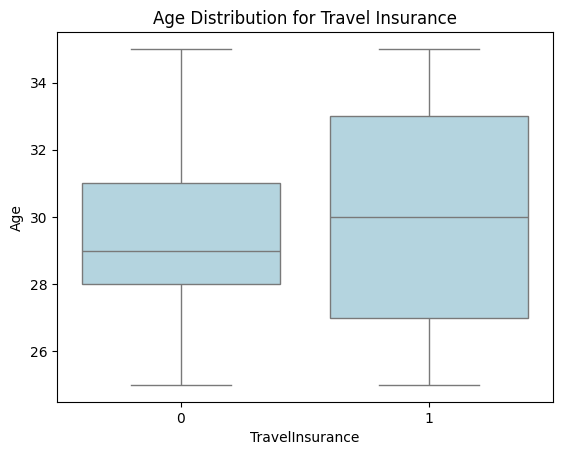

In [ ]:
sns.boxplot(x='TravelInsurance', y='Age', data=df, color='lightblue')
plt.title('Age Distribution for Travel Insurance')
plt.show()

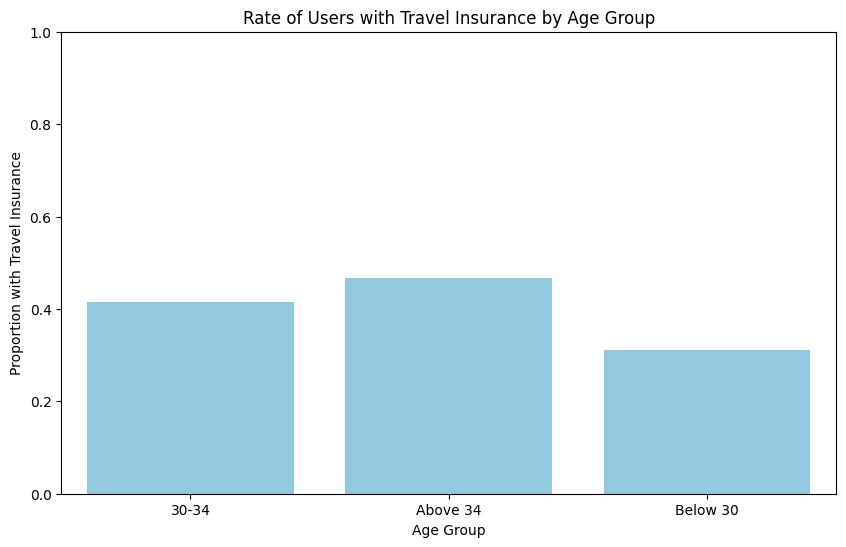

In [ ]:
# Calculate the rate of Travel Insurance by Age Group without modifying the original DataFrame
insurance_rate = df.groupby('Age_group', observed=False)['TravelInsurance'].mean().reset_index()

# Plot the rates
plt.figure(figsize=(10, 6))
sns.barplot(data=insurance_rate, x='Age_group', y='TravelInsurance', color='skyblue')
plt.title('Rate of Users with Travel Insurance by Age Group')
plt.ylabel('Proportion with Travel Insurance')
plt.xlabel('Age Group')
plt.ylim(0, 1)  # Since it's a proportion
plt.show()



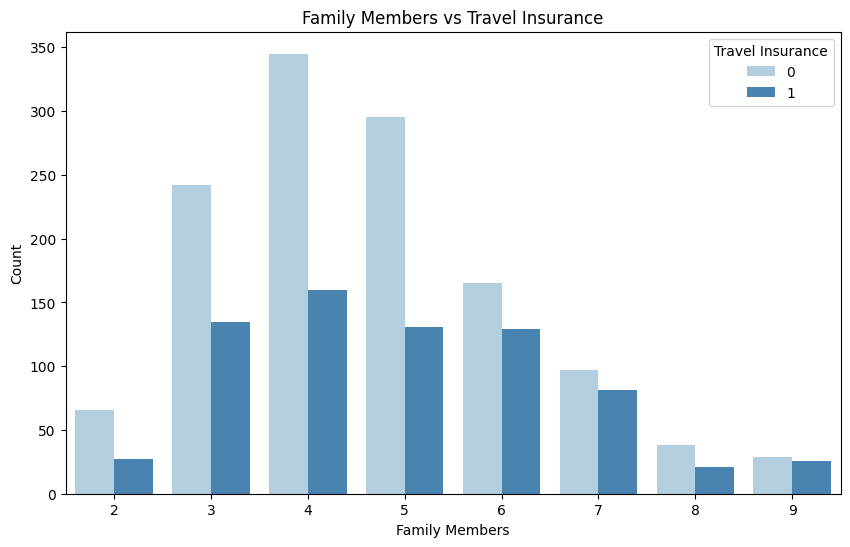

In [ ]:
# Group by Family members and TravelInsurance to get counts
count_data = df.groupby(['FamilyMembers', 'TravelInsurance'], observed=True).size().reset_index(name='Count')

# Plot a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=count_data, x='FamilyMembers', y='Count', hue='TravelInsurance', palette='Blues')

# Customize the plot
plt.title('Family Members vs Travel Insurance')
plt.xlabel('Family Members')
plt.ylabel('Count')
plt.legend(title='Travel Insurance')
plt.show()

# Chronic Diseases vs. Travel Insurance

Purpose: To check if customers with chronic diseases are more or less likely to purchase travel insurance.

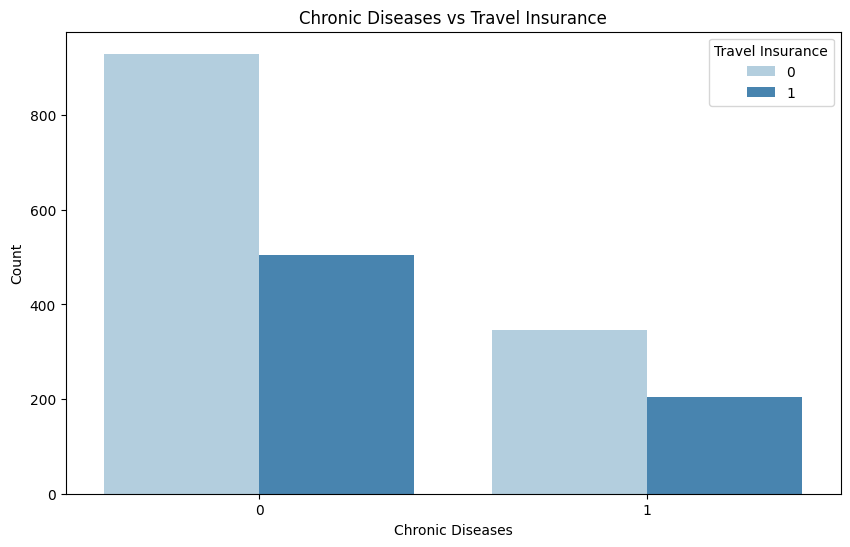

In [ ]:
# Group by ChronicDiseases and TravelInsurance to get counts
count_data = df.groupby(['ChronicDiseases', 'TravelInsurance'], observed=True).size().reset_index(name='Count')

# Plot a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=count_data, x='ChronicDiseases', y='Count', hue='TravelInsurance', palette='Blues')

# Customize the plot
plt.title('Chronic Diseases vs Travel Insurance')
plt.xlabel('Chronic Diseases')
plt.ylabel('Count')
plt.legend(title='Travel Insurance')
plt.show()


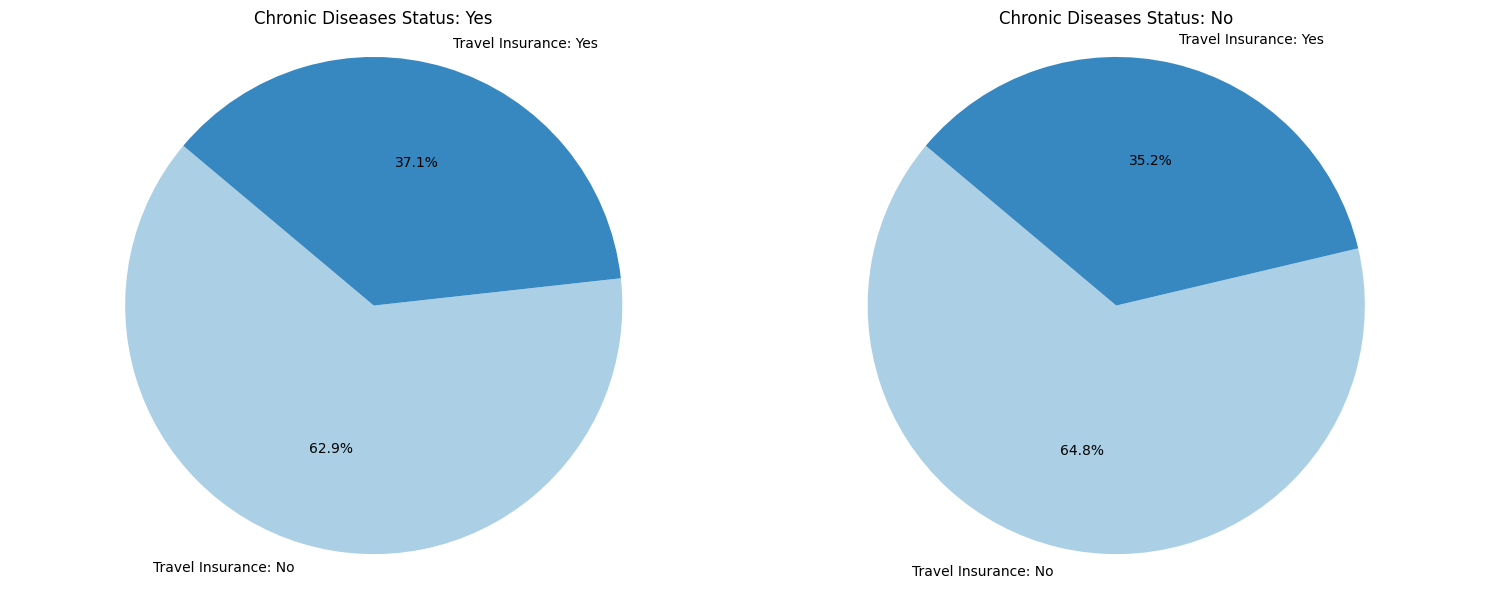

In [ ]:
# Define custom blue color palette with two shades for Yes and No in TravelInsurance
colors = sns.color_palette("Blues", 2)  # Two shades of blue

# Define mappings for readable labels
chronic_map = {1: 'Yes', 0: 'No'}
insurance_map = {1: 'Travel Insurance: Yes', 0: 'Travel Insurance: No'}

# Get unique values for ChronicDiseases
chronic_statuses = df['ChronicDiseases'].unique()

# Create subplots: 1 row, number of unique chronic statuses columns
fig, axes = plt.subplots(1, len(chronic_statuses), figsize=(15, 6))

# Filter data for each category in ChronicDiseases
for ax, chronic_status in zip(axes, chronic_statuses):
    # Subset of data for each chronic disease status
    data = df[df['ChronicDiseases'] == chronic_status]

    # Ensure there is data to plot
    if not data.empty:
        # Count the occurrences of each TravelInsurance status with labels mapped
        insurance_counts = data['TravelInsurance'].map(insurance_map).value_counts()

        # Check if counts are empty
        if insurance_counts.empty:
            print(f"No travel insurance data for Chronic Status: {chronic_status}")
            continue  # Skip to the next chronic status

        # Plot pie chart for the specific ChronicDiseases status
        ax.pie(insurance_counts, labels=insurance_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
        ax.set_title(f'Chronic Diseases Status: {chronic_map[chronic_status]}')
        ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    else:
        ax.set_title(f'Chronic Diseases Status: {chronic_map[chronic_status]}')
        ax.text(0, 0, 'No data available', ha='center', va='center', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


## Annual Income Vs Travel Insurance

In [ ]:
df

,Customer_ID,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age_group,IncomeCategory
0,1042106507,31,Government Sector,Yes,4800000,6,1,No,No,0,30-34,0-5M
1,1045040226,31,Private Sector/Self Employed,Yes,15000000,7,0,No,No,0,30-34,10-15M
2,1048224863,34,Private Sector/Self Employed,Yes,6000000,4,1,No,No,1,30-34,5-10M
3,1046343806,28,Private Sector/Self Employed,Yes,8400000,3,1,No,No,0,Below 30,5-10M
4,1046837252,28,Private Sector/Self Employed,Yes,8400000,8,1,Yes,No,0,Below 30,5-10M
...,...,...,...,...,...,...,...,...,...,...,...,...
1982,1045187625,33,Private Sector/Self Employed,Yes,18000000,4,0,Yes,Yes,1,30-34,15-20M
1983,1041576149,28,Private Sector/Self Employed,Yes,21000000,5,1,No,Yes,0,Below 30,20M+
1984,1041456899,28,Private Sector/Self Employed,Yes,13800000,6,1,No,No,0,Below 30,10-15M
1985,1048690389,34,Private Sector/Self Employed,Yes,12000000,6,0,Yes,Yes,1,30-34,10-15M


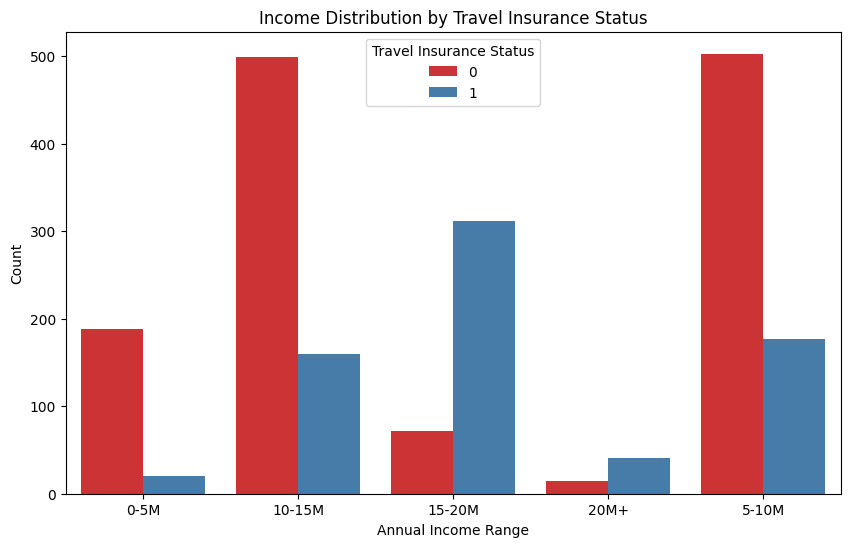

In [ ]:
# Count the number of customers in each income bin, grouped by travel insurance status
income_counts = df.groupby(['IncomeCategory', 'TravelInsurance']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='IncomeCategory', y='count', hue='TravelInsurance', data=income_counts, palette="Set1")
plt.title('Income Distribution by Travel Insurance Status')
plt.xlabel('Annual Income Range')
plt.ylabel('Count')
plt.legend(title='Travel Insurance Status')
plt.show()

In [ ]:
# # # Create income bins
# # data['income_bin'] = pd.cut(data['annual_income'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000],
# #                             labels=['<5M', '5M-10M', '10M-15M', '15M-20M', '20M+'])

# # Count the number of customers in each income bin, grouped by travel insurance status
# income_counts = data.groupby(['income_bins', 'travel_insurance']).size().reset_index(name='count')

# plt.figure(figsize=(10, 6))
# sns.barplot(x='income_bin', y='count', hue='travel_insurance', data=income_counts, palette="Set1")
# plt.title('Income Distribution by Travel Insurance Status')
# plt.xlabel('Annual Income Range')
# plt.ylabel('Count')
# plt.legend(title='Travel Insurance Status', labels=['No', 'Yes'])
# plt.show()

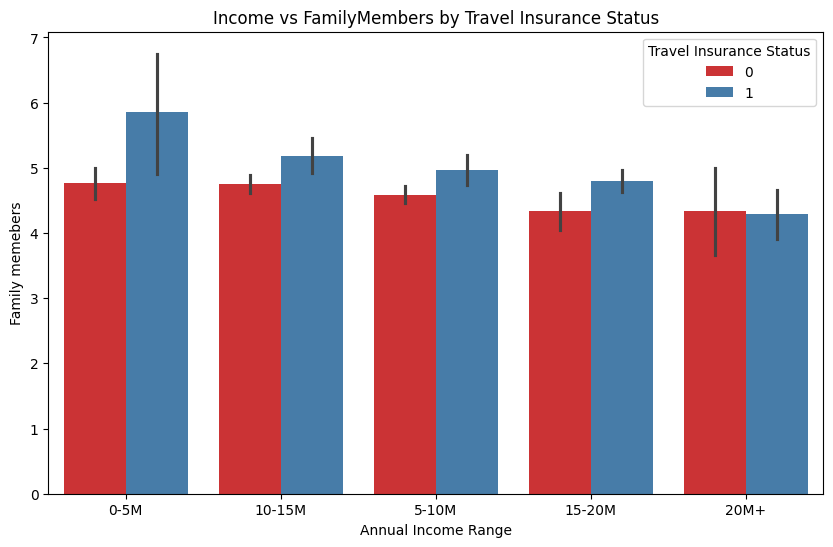

In [ ]:
# Count the number of customers in each income bin, grouped by travel insurance status
#income_counts = df.groupby(['IncomeCategory', 'TravelInsurance', 'FamilyMembers']).size().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='IncomeCategory', y='FamilyMembers', hue='TravelInsurance', data=df, palette="Set1")
plt.title('Income vs FamilyMembers by Travel Insurance Status')
plt.xlabel('Annual Income Range')
plt.ylabel('Family memebers')
plt.legend(title='Travel Insurance Status')
plt.show()

In [ ]:
#('Rate of Travel Insurance by Frequent Flyer Status')


In [ ]:
#('Rate of Travel Insurance by Frequent Flyer Status')


##MULTI-VARIATE ANALYSIS

# Feature Correlation Heatmap

Purpose: Shows correlations between numeric features (like age, annual income, family members). Strong correlations between features can suggest redundancy, while weak correlations between features and the target may indicate a need for new features.

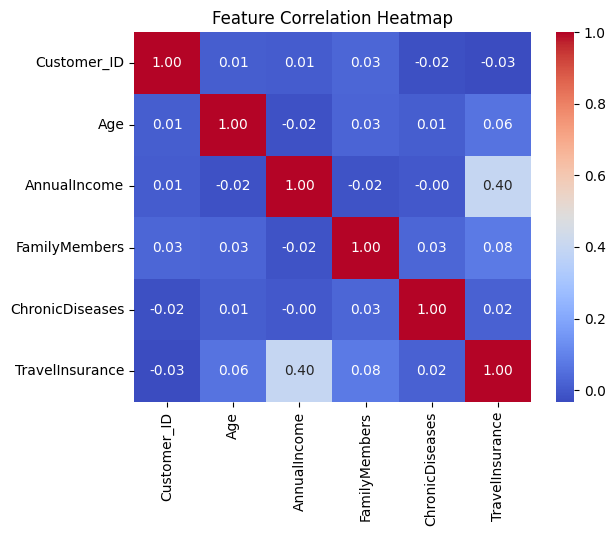

In [ ]:
# Select specific numeric columns for correlation
numeric_df = df.select_dtypes('number')

# Compute correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

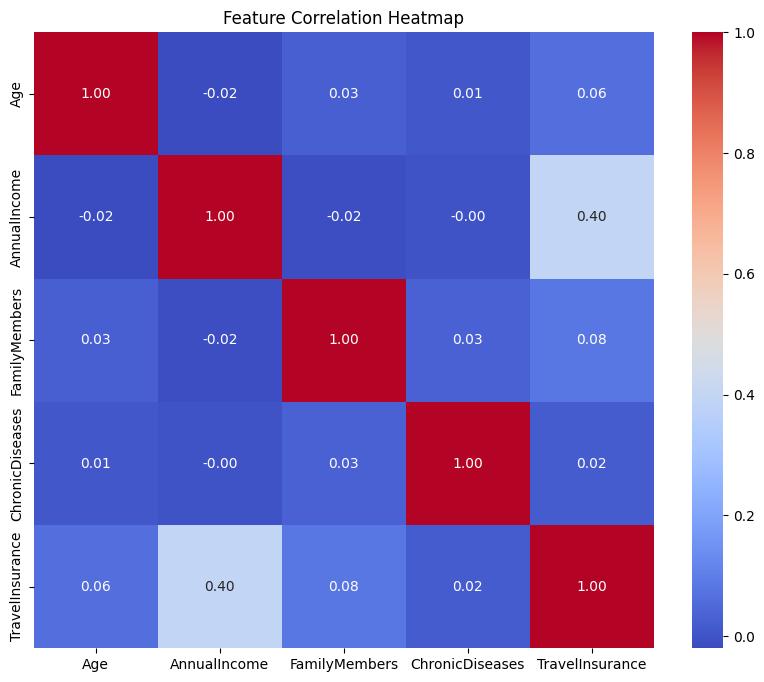

In [ ]:
# Plot the heatmap
# Select specific numeric columns for correlation
numeric_df = df[['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
#  #Filter the relevant columns
# pairplot_data = df[['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'TravelInsurance']]

# # Create pair plots
# sns.pairplot(pairplot_data, hue='TravelInsurance')
# plt.show()

## Age Group, Employment Type, and Travel Insurance Uptake

Purpose: Assess how age group and employment type interact in their influence on purchasing travel insurance.

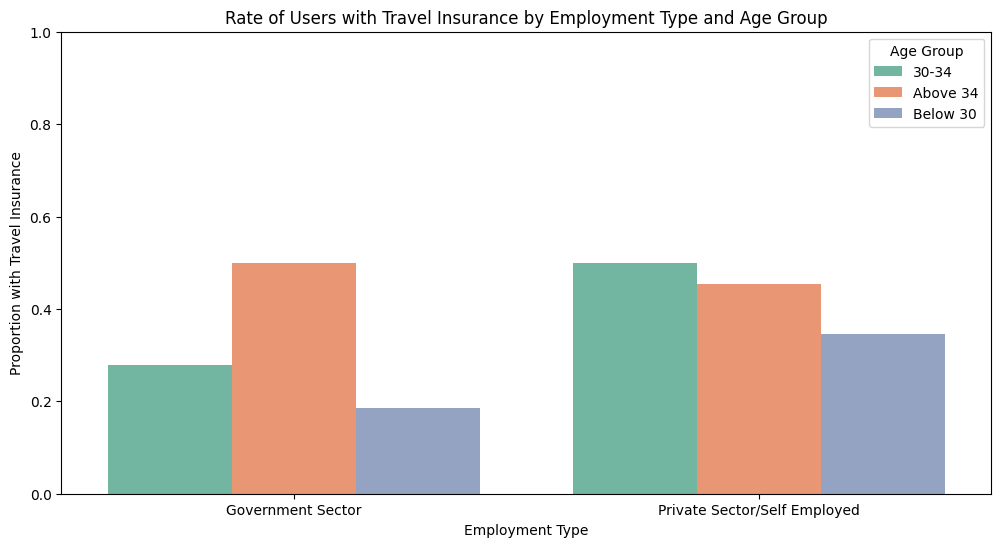

In [ ]:
# Create a copy of the original DataFrame to avoid modifying it
temp_df = df.copy()

# Calculate the mean of Travel Insurance by Employment Type and Age Group
insurance_rate = temp_df.groupby(['Employment Type', 'Age_group'], observed=True)['TravelInsurance'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=insurance_rate, x='Employment Type', y='TravelInsurance', hue='Age_group', palette='Set2')

# Customize the plot
plt.title('Rate of Users with Travel Insurance by Employment Type and Age Group')
plt.xlabel('Employment Type')
plt.ylabel('Proportion with Travel Insurance')
plt.ylim(0, 1)  # Since it's a proportion
plt.legend(title='Age Group')
plt.show()

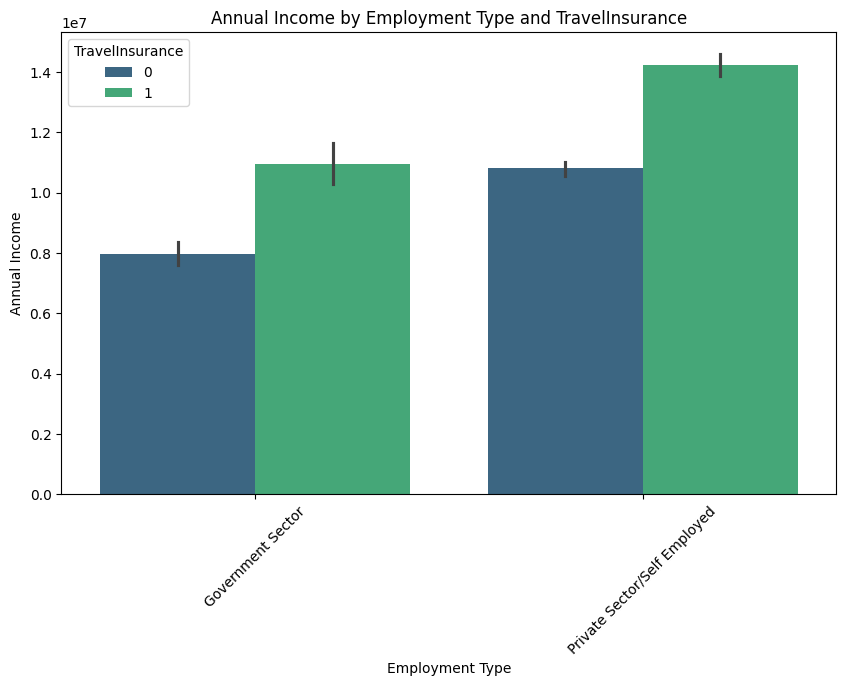

In [ ]:
# Create bar chart for average annual income by employment type
plt.figure(figsize=(10, 6))
sns.barplot(x='Employment Type', y='AnnualIncome', data=df, hue='TravelInsurance', palette='viridis')
plt.title('Annual Income by Employment Type and TravelInsurance')
plt.xlabel('Employment Type')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()

# Arrange Data into Features Matrix and Target Vector

checking if the target column is balanced

In [ ]:
df['TravelInsurance'].value_counts() / len(df) * 100

,count
TravelInsurance,
0,64.26774
1,35.73226


In [ ]:
#set Customer_ID as index
df = df.set_index("Customer_ID")

In [ ]:
#assign the target column to y
y = df['TravelInsurance']
y

#assign the features to X
X = df.drop(columns='TravelInsurance')
#X = df.drop(columns=['TravelInsurance', 'GraduateOrNot', 'ChronicDiseases'])
X.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Age_group,IncomeCategory
Customer_ID,,,,,,,,,,
1042106507,31,Government Sector,Yes,4800000,6,1,No,No,30-34,0-5M
1045040226,31,Private Sector/Self Employed,Yes,15000000,7,0,No,No,30-34,10-15M
1048224863,34,Private Sector/Self Employed,Yes,6000000,4,1,No,No,30-34,5-10M
1046343806,28,Private Sector/Self Employed,Yes,8400000,3,1,No,No,Below 30,5-10M
1046837252,28,Private Sector/Self Employed,Yes,8400000,8,1,Yes,No,Below 30,5-10M


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [ ]:
X_train.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Age_group,IncomeCategory
Customer_ID,,,,,,,,,,
1048791834,25,Private Sector/Self Employed,Yes,6000000,4,1,No,No,Below 30,5-10M
1048157460,29,Private Sector/Self Employed,Yes,14400000,4,0,No,No,Below 30,10-15M
1045494288,25,Private Sector/Self Employed,No,20400000,3,0,Yes,No,Below 30,20M+
1041015189,34,Private Sector/Self Employed,Yes,12000000,6,0,No,No,30-34,10-15M
1041485994,31,Government Sector,No,4200000,4,1,No,No,30-34,0-5M


In [ ]:
#check number of rows in X_train to verify the split
#len(X_train)
#check number of rows in y_train
len(y_train)

1589

In [ ]:
#check number of rows in X_test to verify the split
#len(X_test)
#check number of rows in y_test
len(y_test)

398

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 1048791834 to 1049423501
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1589 non-null   int64 
 1   Employment Type      1589 non-null   object
 2   GraduateOrNot        1589 non-null   object
 3   AnnualIncome         1589 non-null   int64 
 4   FamilyMembers        1589 non-null   int64 
 5   ChronicDiseases      1589 non-null   int64 
 6   FrequentFlyer        1589 non-null   object
 7   EverTravelledAbroad  1589 non-null   object
 8   Age_group            1589 non-null   object
 9   IncomeCategory       1589 non-null   object
dtypes: int64(4), object(6)
memory usage: 136.6+ KB


In [ ]:
cat_cols= X_train.select_dtypes('object').columns
cat_cols

Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad', 'Age_group', 'IncomeCategory'],
      dtype='object')

In [ ]:
for col in cat_cols:
    print(f"{col}: {set(X_train[col].unique())}")


Employment Type: {'Private Sector/Self Employed', 'Government Sector'}
GraduateOrNot: {'No', 'Yes'}
FrequentFlyer: {'No', 'Yes'}
EverTravelledAbroad: {'No', 'Yes'}
Age_group: {'Above 34', '30-34', 'Below 30'}
IncomeCategory: {'20M+', '5-10M', '10-15M', '0-5M', '15-20M'}


In [ ]:
#Feature selection using Chi-square test
# Dictionary to store chi-square test results for each feature
chi2_results = {}
selected_categorical_features = []

# Perform Chi-Squared test on each categorical feature
for col in cat_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(X_train[col], y_train)

    # Perform Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Store the results in the dictionary
    chi2_results[col] = {'chi2': chi2, 'p-value': p}

    # Select feature if p-value is below 0.05
    if p < 0.05:
        selected_categorical_features.append(col)

# Convert results to a DataFrame for readability
chi2_results_df = pd.DataFrame(chi2_results).T

# Display chi-square values and p-values for all features
print("Chi-Square Test Results for All Categorical Features:")
print(chi2_results_df)

# Display selected categorical features based on the p-value threshold
print("\nSelected Categorical Features (p < 0.05):")
print(selected_categorical_features)

Chi-Square Test Results for All Categorical Features:
                           chi2       p-value
Employment Type       28.952676  7.416829e-08
GraduateOrNot          1.625721  2.022959e-01
FrequentFlyer         92.330514  7.334463e-22
EverTravelledAbroad  302.236995  1.072535e-67
Age_group             18.649729  8.917903e-05
IncomeCategory       394.159573  5.083658e-84

Selected Categorical Features (p < 0.05):
['Employment Type', 'FrequentFlyer', 'EverTravelledAbroad', 'Age_group', 'IncomeCategory']


In [ ]:
# Select numeric features only
numeric_columns = X_train.select_dtypes(include=['number']).columns

In [ ]:
#Feature selection using correlation coefficients

# Calculate correlation coefficients with the target
correlations = {}
for col in numeric_columns:
    corr = np.corrcoef(X_train[col], y_train)[0, 1]  # Pearson correlation
    correlations[col] = corr

# Convert to DataFrame for better readability
correlations_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation'])
correlations_df = correlations_df.sort_values(by='Correlation', ascending=False)

# Display correlations for all numeric features
print("Correlation Coefficients with Target:\n", correlations_df)

#select features based on 0.05 correlation threshold
selected_features = correlations_df[correlations_df['Correlation'].abs() > 0.05]['Feature'].tolist()
print("Selected features based on Correlation Coefficient:", selected_features)

Correlation Coefficients with Target:
            Feature  Correlation
1     AnnualIncome     0.406402
2    FamilyMembers     0.072547
0              Age     0.059315
3  ChronicDiseases     0.009040
Selected features based on Correlation Coefficient: ['AnnualIncome', 'FamilyMembers', 'Age']


In [ ]:
#Using ANOVA
# Select only numeric columns from X_train
X_train_numeric = X_train[numeric_columns]

# Apply SelectKBest on numeric columns
selector = SelectKBest(score_func=f_classif, k=3)
X_selected_numeric = selector.fit_transform(X_train_numeric, y_train)

# Get F-values and p-values for all numeric features
f_values, p_values = selector.scores_, selector.pvalues_

# Create a DataFrame for better readability
feature_scores_df = pd.DataFrame({
    'Feature': numeric_columns,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='F-Value', ascending=False)

# Get selected feature names
selected_numeric_features = [feature for feature, selected in zip(numeric_columns, selector.get_support()) if selected]

# Output the results
print("Selected Numeric Features:")
print(selected_numeric_features)

print("\nFeature Scores:")
print(feature_scores_df)

Selected Numeric Features:
['Age', 'AnnualIncome', 'FamilyMembers']

Feature Scores:
           Feature     F-Value       P-Value
1     AnnualIncome  313.968033  3.037623e-64
2    FamilyMembers    8.396709  3.810592e-03
0              Age    5.603190  1.804722e-02
3  ChronicDiseases    0.129692  7.188000e-01


In [ ]:
# #instantiate a oneHot encoder
# cat_cols=['Employment Type', 'GraduateOrNot', 'FrequentFlyer','EverTravelledAbroad']
# encoder_gen= OneHotEncoder(handle_unknown='ignore', sparse_output = False )

# #tuple
# cat_tuple = ('categorical', encoder_gen, cat_cols)
# cat_tuple

In [ ]:
# Define the category order for specific columns
IncomeCategory = ['20M+', '15-20M', '10-15M', '5-10M', '0-5M']
Age_group = ['Above 34', '30-34', 'Below 30']

# List of categorical columns
cat_cols_1 = ['IncomeCategory', 'Age_group']  # Columns to apply custom categories
cat_cols_2 = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']  # Columns to auto-detect categories

# OrdinalEncoder for columns with custom categories (IncomeCategory, Age_group)
encoder_custom = OrdinalEncoder(categories=[IncomeCategory, Age_group])

# OrdinalEncoder for other columns (auto-detect categories)
encoder_auto = OrdinalEncoder()

# Tuple for ordinal encoding
ordinal_custom = ('Ordinal_Custom', encoder_custom, cat_cols_1)
ordinal_auto = ('Ordinal_Auto', encoder_auto, cat_cols_2)

# Output the tuples
print(ordinal_custom)
print(ordinal_auto)


('Ordinal_Custom', OrdinalEncoder(categories=[['20M+', '15-20M', '10-15M', '5-10M', '0-5M'],
                           ['Above 34', '30-34', 'Below 30']]), ['IncomeCategory', 'Age_group'])
('Ordinal_Auto', OrdinalEncoder(), ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad'])


In [ ]:
#get list of numeric columns and instantiate a StandardScaler
num_cols= ['Age', 'AnnualIncome', 'FamilyMembers']
num_cols

#instantiate a standard scaler
scaler = StandardScaler()

#construct a tuple for column transformer with the scaler.
num_tuple = ('numeric', scaler, num_cols)
num_tuple

('numeric', StandardScaler(), ['Age', 'AnnualIncome', 'FamilyMembers'])

In [ ]:
#instantiate the ColumnTransformer with both numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        # cat_tuple, # One-hot encoding the categorical columns
        ordinal_custom,
        ordinal_auto,
        num_tuple
    ],
)

preprocessor

ColumnTransformer(transformers=[('Ordinal_Custom',
                                 OrdinalEncoder(categories=[['20M+', '15-20M',
                                                             '10-15M', '5-10M',
                                                             '0-5M'],
                                                            ['Above 34',
                                                             '30-34',
                                                             'Below 30']]),
                                 ['IncomeCategory', 'Age_group']),
                                ('Ordinal_Auto', OrdinalEncoder(),
                                 ['Employment Type', 'GraduateOrNot',
                                  'FrequentFlyer', 'EverTravelledAbroad']),
                                ('numeric', StandardScaler(),
                                 ['Age', 'AnnualIncome', 'FamilyMembers'])])

In [ ]:
# Fit the preprocessor on X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('Ordinal_Custom',
                                 OrdinalEncoder(categories=[['20M+', '15-20M',
                                                             '10-15M', '5-10M',
                                                             '0-5M'],
                                                            ['Above 34',
                                                             '30-34',
                                                             'Below 30']]),
                                 ['IncomeCategory', 'Age_group']),
                                ('Ordinal_Auto', OrdinalEncoder(),
                                 ['Employment Type', 'GraduateOrNot',
                                  'FrequentFlyer', 'EverTravelledAbroad']),
                                ('numeric', StandardScaler(),
                                 ['Age', 'AnnualIncome', 'FamilyMembers'])])

In [ ]:
# Transform both X_train and X_test
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# Create a list of new column names for the transformed DataFrame
# One-hot encoded columns
# cat_transformer = preprocessor.transformers_[0][1]  # This gets the OneHotEncoder
# cat_cols_encoded = cat_transformer.get_feature_names_out(input_features=cat_cols)

# Ordinal encoded columns (if necessary, they are already specified in the encoder)
ordinal_cols_encoded = cat_cols # We keep the same column names as specified

# # Numeric columns
num_cols_encoded = num_cols  # Numeric columns will be scaled, but we keep their names

# List of columns after transformation
transformed_column_names = list(ordinal_cols_encoded) + list(num_cols_encoded) #+ list(cat_cols_encoded)

# Convert the transformed data back to a DataFrame with the correct column names
X_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_column_names)

# Add the 'chronic disease' column from the original dataset
X_transformed_df['ChronicDiseases'] = X_train['ChronicDiseases'].values

# Print the resulting DataFrame
print(X_transformed_df.head())

   Employment Type  GraduateOrNot  FrequentFlyer  EverTravelledAbroad  \
0              3.0            2.0            1.0                  1.0   
1              2.0            2.0            1.0                  1.0   
2              0.0            2.0            1.0                  0.0   
3              2.0            1.0            1.0                  1.0   
4              4.0            1.0            0.0                  0.0   

   Age_group  IncomeCategory       Age  AnnualIncome  FamilyMembers  \
0        0.0             0.0 -1.594063     -1.158916      -0.477724   
1        0.0             0.0 -0.228399      0.702815      -0.477724   
2        1.0             0.0 -1.594063      2.032622      -1.094880   
3        0.0             0.0  1.478682      0.170892       0.756590   
4        0.0             0.0  0.454434     -1.557858      -0.477724   

   ChronicDiseases  
0                1  
1                0  
2                0  
3                0  
4                1  


In [ ]:
# Convert the transformed data back to a DataFrame with the correct column names
X_Testtransformed_df = pd.DataFrame(X_test_transformed, columns=transformed_column_names)
# Add the 'chronic disease' column from the original dataset
X_Testtransformed_df['ChronicDiseases'] = X_test['ChronicDiseases'].values
print(X_Testtransformed_df)

     Employment Type  GraduateOrNot  FrequentFlyer  EverTravelledAbroad  \
0                3.0            2.0            1.0                  1.0   
1                1.0            2.0            1.0                  1.0   
2                2.0            2.0            1.0                  1.0   
3                4.0            1.0            0.0                  1.0   
4                1.0            1.0            1.0                  1.0   
..               ...            ...            ...                  ...   
393              2.0            2.0            1.0                  1.0   
394              4.0            2.0            1.0                  0.0   
395              1.0            2.0            1.0                  0.0   
396              2.0            1.0            0.0                  1.0   
397              2.0            2.0            1.0                  1.0   

     Age_group  IncomeCategory       Age  AnnualIncome  FamilyMembers  \
0          0.0            

In [ ]:
#Feature selection using correlation coefficients
columns= X_transformed_df.columns
# Calculate correlation coefficients with the target
correlations = {}
for col in columns:
    corr = np.corrcoef(X_transformed_df[col], y_train)[0, 1]  # Pearson correlation
    correlations[col] = corr

# Convert to DataFrame for better readability
correlations_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation'])
correlations_df = correlations_df.sort_values(by='Correlation', ascending=False)

# Display correlations for all numeric features
print("Correlation Coefficients with Target:\n", correlations_df)

#select features based on 0.05 correlation threshold
selected_features = correlations_df[correlations_df['Correlation'].abs() > 0.05]['Feature'].tolist()
print("Selected features based on Correlation Coefficient:", selected_features)

Correlation Coefficients with Target:
                Feature  Correlation
5       IncomeCategory     0.437799
7         AnnualIncome     0.406402
4            Age_group     0.242651
2        FrequentFlyer     0.136445
8        FamilyMembers     0.072547
6                  Age     0.059315
3  EverTravelledAbroad     0.033835
9      ChronicDiseases     0.009040
1        GraduateOrNot    -0.105666
0      Employment Type    -0.423507
Selected features based on Correlation Coefficient: ['IncomeCategory', 'AnnualIncome', 'Age_group', 'FrequentFlyer', 'FamilyMembers', 'Age', 'GraduateOrNot', 'Employment Type']


## Decision Tree

In [ ]:
#Decision tree model
model1 = DecisionTreeClassifier(random_state=42)

In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# # Forward Selection
# sfs = SFS(
#     model1,
#     k_features=8,
#     forward=True,
#     floating=False,
#     scoring='recall_macro',
#     cv=5  # Cross-validation folds
# )

# # Fit the SFS selector
# sfs = sfs.fit(X_transformed_df, y_train)

# # Selected features
# selected_features = list(sfs.k_feature_names_)
# print("Selected Features:", selected_features)

# Train the model with the selected features
# X_train_selected = X_transformed_df[selected_features]
# X_test_selected= X_Testtransformed_df[selected_features]
# model.fit(X_train_sfs, y_train)

# # Evaluate performance
# y_pred = model.predict(X_test_sfs)
# print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
# Select features based on the model
selector = SelectFromModel(model1, threshold=0.02)

# Fit the selector
selector.fit(X_transformed_df, y_train)

# Get the selected features
selected_features = X_transformed_df.columns[selector.get_support()]
print("Selected Features:", selected_features)

# # Transform the dataset
# X_train_selected = selector.transform(X_transformed_df)
# X_test_selected = selector.transform(X_Testtransformed_df)

Selected Features: Index(['Employment Type', 'FrequentFlyer', 'Age_group', 'Age', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases'],
      dtype='object')


In [ ]:
# Set up RFE
rfe = RFE(estimator=model1, n_features_to_select=6)

# Fit RFE on training data
rfe.fit(X_transformed_df, y_train)

# Check selected features
selected_features = [X_transformed_df.columns[i] for i, selected in enumerate(rfe.support_) if selected]
print("Selected Features:", selected_features)

# Get feature rankings and names
feature_rankings = pd.DataFrame({
    'Feature': X_transformed_df.columns,
    'Ranking': rfe.ranking_
})

# Sort by ranking (ascending order)
feature_rankings_sorted = feature_rankings.sort_values(by='Ranking')

# Print the ranking of features in a table format
print("\nFeature Rankings (sorted):")
print(feature_rankings_sorted)

# Train a final model using the selected features only
X_train_selected = rfe.transform(X_transformed_df)
X_test_selected = rfe.transform(X_Testtransformed_df)



Selected Features: ['FrequentFlyer', 'Age_group', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases']

Feature Rankings (sorted):
               Feature  Ranking
2        FrequentFlyer        1
4            Age_group        1
6                  Age        1
7         AnnualIncome        1
8        FamilyMembers        1
9      ChronicDiseases        1
0      Employment Type        2
3  EverTravelledAbroad        3
5       IncomeCategory        4
1        GraduateOrNot        5


In [ ]:
# Train the model on selected features
model1.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# # Make predictions on the transformed test data
y_pred = model1.predict(X_test_selected)

In [ ]:
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[229  28]
 [ 49  92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       257
           1       0.77      0.65      0.70       141

    accuracy                           0.81       398
   macro avg       0.80      0.77      0.78       398
weighted avg       0.80      0.81      0.80       398



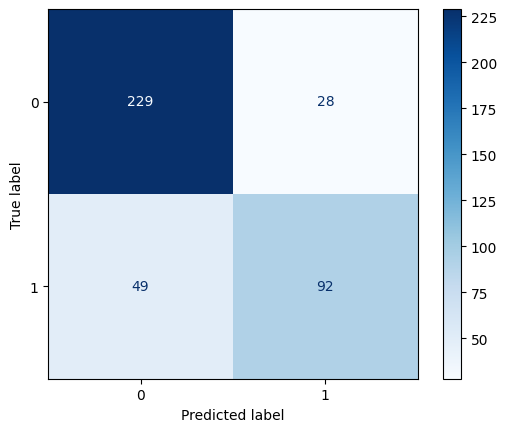

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [ ]:


# #Define the parameter grid

param_distributions = {
    'max_depth': [5, 10, 20, 50, None],
    'min_samples_split': [5, 10, 20, 50],
    'min_samples_leaf': [2, 5, 10, 20, 50],
    'min_weight_fraction_leaf': [0.0, 0.001, 0.01, 0.05],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy'],
}


# Set up Randomized Search
random_search = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42  # Ensures reproducibility
)

# Fit the randomized search
random_search.fit(X_train_selected, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters found:  {'min_weight_fraction_leaf': 0.05, 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}
Best score:  0.7141919548887216


In [ ]:
# Evaluate the best model on the test set
#y_pred = grid_search.predict(X_test_selected)
y_pred= random_search.predict(X_test_selected)

In [ ]:
 # Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[254   3]
 [ 61  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       257
           1       0.96      0.57      0.71       141

    accuracy                           0.84       398
   macro avg       0.89      0.78      0.80       398
weighted avg       0.86      0.84      0.83       398



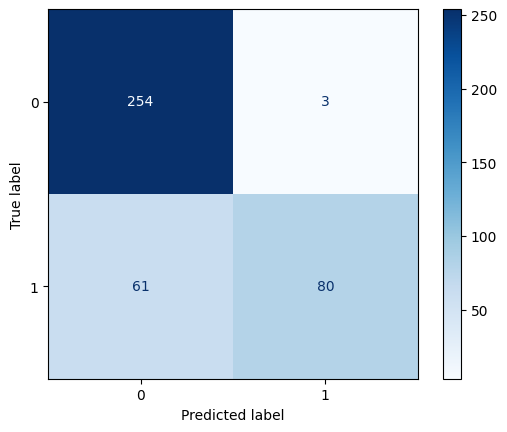

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

# Random forest model

In [ ]:
model2 = RandomForestClassifier(random_state=42)

In [ ]:
# Select features based on the model
selector = SelectFromModel(model2, threshold=0.02)

# Fit the selector
selector.fit(X_transformed_df, y_train)

# Get the selected features
selected_features = X_transformed_df.columns[selector.get_support()]
print("Selected Features:", selected_features)

# # Transform the dataset
# X_train_selected = selector.transform(X_transformed_df)
# X_test_selected = selector.transform(X_Testtransformed_df)

Selected Features: Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'Age_group',
       'IncomeCategory', 'Age', 'AnnualIncome', 'FamilyMembers',
       'ChronicDiseases'],
      dtype='object')


In [ ]:
# Set up RFE
rfe = RFE(estimator=model2, n_features_to_select=6)

# Fit RFE on training data
rfe.fit(X_transformed_df, y_train)

# Check selected features
selected_features = [X_transformed_df.columns[i] for i, selected in enumerate(rfe.support_) if selected]
print("Selected Features:", selected_features)

# Get feature rankings and names
feature_rankings = pd.DataFrame({
    'Feature': X_transformed_df.columns,
    'Ranking': rfe.ranking_
})

# Sort by ranking (ascending order)
feature_rankings_sorted = feature_rankings.sort_values(by='Ranking')

# Print the ranking of features in a table format
print("\nFeature Rankings (sorted):")
print(feature_rankings_sorted)

# Train a final model using the selected features only
X_train_selected = rfe.transform(X_transformed_df)
X_test_selected = rfe.transform(X_Testtransformed_df)

Selected Features: ['Employment Type', 'Age_group', 'IncomeCategory', 'Age', 'AnnualIncome', 'FamilyMembers']

Feature Rankings (sorted):
               Feature  Ranking
0      Employment Type        1
4            Age_group        1
5       IncomeCategory        1
6                  Age        1
7         AnnualIncome        1
8        FamilyMembers        1
9      ChronicDiseases        2
1        GraduateOrNot        3
2        FrequentFlyer        4
3  EverTravelledAbroad        5


In [ ]:
# Train the model on selected features
model2.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# # Make predictions on the transformed test data
y_pred = model2.predict(X_test_selected)

In [ ]:
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[235  22]
 [ 51  90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       257
           1       0.80      0.64      0.71       141

    accuracy                           0.82       398
   macro avg       0.81      0.78      0.79       398
weighted avg       0.82      0.82      0.81       398



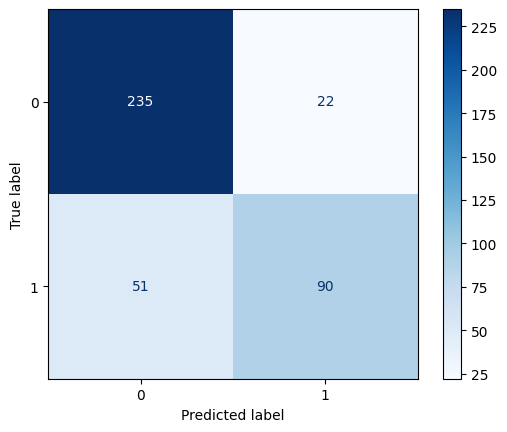

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

#Define the parameter grid
param_distributions = {
    'n_estimators': randint(50, 200),  # Random integers between 50 and 200
    'max_depth': [5, 10, 20, None],   # Fixed choices
    'min_samples_split': randint(2, 10),  # Random integers between 2 and 10
    'max_features': ['sqrt', 'log2', None],  # Fixed choices
    'class_weight':['balanced', None]
}


# Set up Randomized Search
random_search = RandomizedSearchCV(
    estimator=model2,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=42  # Ensures reproducibility
)

# Fit the randomized search
random_search.fit(X_train_selected, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best parameters found:  {'class_weight': 'balanced', 'max_depth': 20, 'max_features': None, 'min_samples_split': 4, 'n_estimators': 137}
Best score:  0.6644465145163794


In [ ]:
# Evaluate the best model on the test set
#y_pred = grid_search.predict(X_test_selected)
y_pred= random_search.predict(X_test_selected)

In [ ]:
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[227  30]
 [ 47  94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       257
           1       0.76      0.67      0.71       141

    accuracy                           0.81       398
   macro avg       0.79      0.77      0.78       398
weighted avg       0.80      0.81      0.80       398



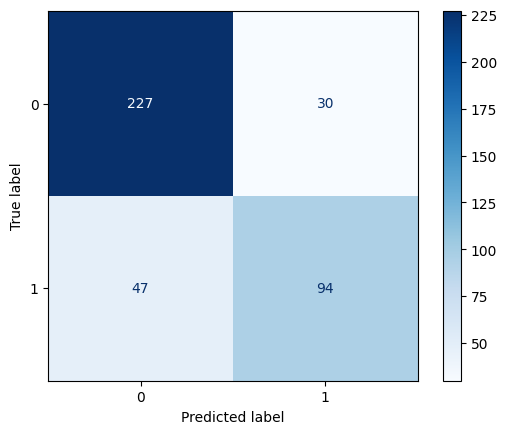

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [ ]:
model3 = GradientBoostingClassifier(random_state=42)

In [ ]:
# # Select features based on the model
# selector = SelectFromModel(model3, threshold=0.01)

# # Fit the selector
# selector.fit(X_transformed_df, y_train)

# # Get the selected features
# selected_features = X_transformed_df.columns[selector.get_support()]
# print("Selected Features:", selected_features)

# # Transform the dataset
# X_train_selected = selector.transform(X_transformed_df)
# X_test_selected = selector.transform(X_Testtransformed_df)

In [ ]:
# Set up RFE
rfe = RFE(estimator=model3, n_features_to_select=6)

# Fit RFE on training data
rfe.fit(X_transformed_df, y_train)

# Check selected features
selected_features = [X_transformed_df.columns[i] for i, selected in enumerate(rfe.support_) if selected]
print("Selected Features:", selected_features)

# Get feature rankings and names
feature_rankings = pd.DataFrame({
    'Feature': X_transformed_df.columns,
    'Ranking': rfe.ranking_
})

# Sort by ranking (ascending order)
feature_rankings_sorted = feature_rankings.sort_values(by='Ranking')

# Print the ranking of features in a table format
print("\nFeature Rankings (sorted):")
print(feature_rankings_sorted)

# Train a final model using the selected features only
X_train_selected = rfe.transform(X_transformed_df)
X_test_selected = rfe.transform(X_Testtransformed_df)

Selected Features: ['Employment Type', 'EverTravelledAbroad', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases']

Feature Rankings (sorted):
               Feature  Ranking
0      Employment Type        1
3  EverTravelledAbroad        1
6                  Age        1
7         AnnualIncome        1
8        FamilyMembers        1
9      ChronicDiseases        1
2        FrequentFlyer        2
4            Age_group        3
5       IncomeCategory        4
1        GraduateOrNot        5


In [ ]:
# Train the model on selected features
model3.fit(X_train_selected, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# # Make predictions on the transformed test data
y_pred = model3.predict(X_test_selected)

In [ ]:
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[256   1]
 [ 61  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       257
           1       0.99      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.90      0.78      0.81       398
weighted avg       0.87      0.84      0.83       398



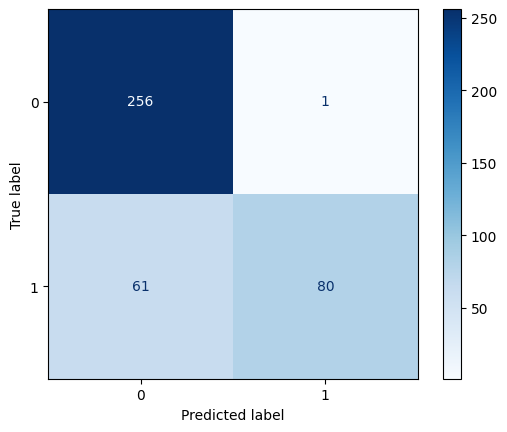

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

In [ ]:
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# #Define the parameter grid
#for gradient boosting
param_distributions = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': randint(100, 500),
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    #'subsample': [0.6, 0.8],
    'max_features': ['sqrt', 'log2', None]
}

# Set up Randomized Search
random_search = RandomizedSearchCV(
    estimator=model3,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=42  # Ensures reproducibility
)

# Fit the randomized search
random_search.fit(X_train_selected, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 393}
Best score:  0.6503803757180562


In [ ]:
# Evaluate the best model on the test set
#y_pred = grid_search.predict(X_test_selected)
y_pred= random_search.predict(X_test_selected)

In [ ]:
# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[237  20]
 [ 50  91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       257
           1       0.82      0.65      0.72       141

    accuracy                           0.82       398
   macro avg       0.82      0.78      0.80       398
weighted avg       0.82      0.82      0.82       398



In [ ]:

# Predict probabilities instead of hard labels
y_probs = random_search.best_estimator_.predict_proba(X_test_selected)[:, 1]

# Adjust threshold for recall optimization
threshold = 0.3  # Example threshold
y_pred_adj = (y_probs >= threshold).astype(int)

# Evaluate performance
print("\nAdjusted Threshold Metrics:")
print("Recall:", recall_score(y_test, y_pred_adj))
print("Precision:", precision_score(y_test, y_pred_adj))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adj))


Adjusted Threshold Metrics:
Recall: 0.6950354609929078
Precision: 0.6533333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       257
           1       0.65      0.70      0.67       141

    accuracy                           0.76       398
   macro avg       0.74      0.75      0.74       398
weighted avg       0.77      0.76      0.76       398



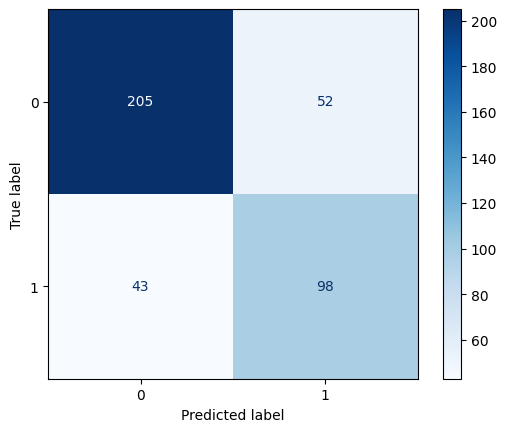

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_adj, cmap='Blues')

In [ ]:
# # Best parameters
# print("Best parameters found: ", grid_search.best_params_)
# print("best_model: ", grid_search.best_estimator_)
# print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

In [ ]:
# from sklearn.model_selection import GridSearchCV
# # from sklearn.pipeline import Pipeline

# # Define the parameter

# #for random forest
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [5, 10, 20, None],
#     'min_samples_split':[2, 5, 10],
#     'max_features': ['sqrt', 'log2', None]
# }

# #for gradient boosting
# # param_grid = {
# #     'learning_rate': [0.01, 0.05, 0.1],
# #     'n_estimators': [100, 200, 300, 400],
# #     'max_depth': [3, 5, 7],
# #     #'min_samples_split': [2, 5, 10],
# #     #'min_samples_leaf': [1, 5, 10],
# #     'max_features': ['sqrt', 'log2', None]
# # }

# #for decision trees
# # param_grid = {
# #     'max_depth': [5, 10, 20, 50, None],
# #     'min_samples_split': [5, 10, 20, 50],
# #     'min_samples_leaf': [2, 5, 10, 20, 50],
# #     'min_weight_fraction_leaf': [0.0, 0.001, 0.01, 0.05],
# #     'class_weight': [None, 'balanced'],
# #     'criterion': ['gini', 'entropy'],
# #     'splitter': ['best']
# # }

# # Set up Grid Search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall_macro', n_jobs=-1)

# # Fit the grid search
# grid_search.fit(X_train_selected, y_train)